In [65]:
import pandas as pd 
import numpy as np
import networkx as nx
#from NetworkxD3 import simpleNetworkx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from apyori import apriori
import random
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import math
from arulesviz import Arulesviz

In [66]:
df = pd.read_csv('dataset/tel_samp_rec.csv', encoding="latin-1")
df.head()

,Defence.date,Domains,Full.Text.Language,def.date,n.disc,these.id,disc1.lev1,disc1.lev2,disc1.lev3,disc2.lev1,...,n.tag,disc1.rec.lev1,disc1.rec.lev2,disc1.rec.lev3,disc2.rec.lev1,disc2.rec.lev2,disc2.rec.lev3,disc3.rec.lev1,disc3.rec.lev2,disc3.rec.lev3
0,2010/09/23,"Sciences du Vivant [q-bio] / Ecologie, Environ...",French,2010.0,1,tel-00662843v1,Sciences du Vivant [q-bio],"Ecologie, Environnement",Ecosystèmes,NaN,...,1,X,67 - Biologie des populations et écologie,"Ecologie, Environnement",NaN,NaN,NaN,NaN,NaN,NaN
1,2009/11/02,Sciences de l'Homme et Société,French,2009.0,1,tel-00491490v1,Sciences de l'Homme et Société,NaN,NaN,NaN,...,1,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996/05/30,Sciences du Vivant [q-bio] / Alimentation et N...,French,1996.0,1,tel-01776364v1,Sciences du Vivant [q-bio],Alimentation et Nutrition,NaN,Sciences du Vivant [q-bio],...,2,X,68 - Biologie des organismes,Alimentation et Nutrition,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/02/02,Informatique [cs] / Autre [cs.OH] \r\n\r\nInf...,French,2018.0,1,tel-02437294v1,Informatique [cs],Autre [cs.OH],NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
4,2015/07/08,Informatique [cs] / Automatique \r\n\r\nInfor...,French,2015.0,1,tel-01245100v1,Informatique [cs],Automatique,NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN


In [67]:
disc = df[["disc1.rec.lev1", "disc2.rec.lev1", "disc3.rec.lev1"]]
disc.head()

,disc1.rec.lev1,disc2.rec.lev1,disc3.rec.lev1
0,X,NaN,NaN
1,IV,NaN,NaN
2,X,NaN,NaN
3,V,V,NaN
4,V,V,NaN


In [68]:
transactions = disc.values.tolist()

temp = list()
type(temp)
for x in transactions:
    transaction = [y for y in x if str(y) != 'nan']
    temp.append(transaction)
    
transactions = [x for x in temp if len(x) > 1]

In [69]:
encoder = TransactionEncoder().fit(transactions)

# One-hot encode itemsets by applying fit and transform
disc2 = encoder.transform(transactions)
# Convert one-hot encoded data to DataFrame
disc2 = pd.DataFrame(disc2, columns = encoder.columns_)
disc2.head()

,I,I - Droit,II,III,IV,IX,V,VI,VII,VIII,X,XII,pharmacie
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False,False,False


In [70]:
disc2 = disc2[(disc2 == True).sum(axis = 1) >= 2]

In [71]:
disc3 = apriori(disc2, min_support = 0.0003, use_colnames = True).sort_values('support', ascending = False).reset_index(drop = True)
disc3['length'] = disc3["itemsets"].apply(lambda x: len(x))
disc3.head()

,support,itemsets,length
0,0.535092,(IX),1
1,0.299491,(V),1
2,0.240289,(VI),1
3,0.230512,(X),1
4,0.193812,(IV),1


In [72]:
rules = association_rules(disc3, metric = "lift", min_threshold = 1).sort_values("lift", ascending = False).reset_index(drop = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I),(I - Droit),0.027860,0.011117,0.002947,0.105769,9.514133,0.002637,1.105848
1,(I - Droit),(I),0.011117,0.027860,0.002947,0.265060,9.514133,0.002637,1.322748
2,(I),(IV),0.027860,0.193812,0.022636,0.812500,4.192208,0.017236,4.299670
3,(IV),(I),0.193812,0.027860,0.022636,0.116793,4.192208,0.017236,1.100694
4,(pharmacie),(X),0.036834,0.230512,0.030672,0.832727,3.612517,0.022182,4.600202


In [83]:
# Convert antecedents and consequents into strings
rules_copy = rules
rules_copy['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules_copy['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

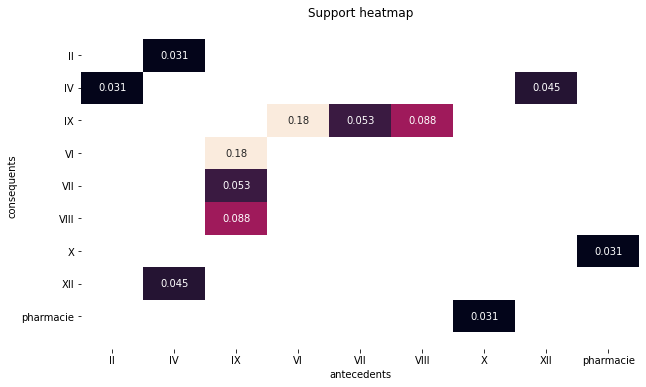

In [84]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules_copy.pivot(index='consequents', columns='antecedents', values='support')
plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.yticks(rotation=0)
# Add title and axis names
plt.title('Support heatmap')
plt.show()

In [85]:
support=rules['support'].to_numpy()
confidence=rules['confidence'].to_numpy()

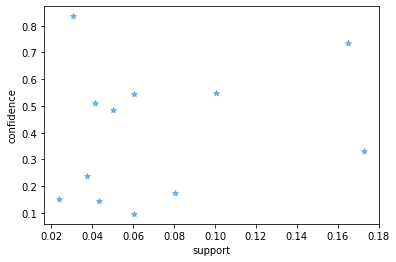

In [86]:
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [87]:
rules_copy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,II,IV,0.062952,0.193812,0.041342,0.510372,2.568842,0.019141,1.605544,II,IV,0
1,IV,II,0.193812,0.062952,0.023842,0.154214,2.568842,0.019141,1.117814,IV,II,1
2,IV,XII,0.193812,0.092285,0.037370,0.236513,2.508679,0.026984,1.181172,IV,XII,2
3,XII,IV,0.092285,0.193812,0.049870,0.483712,2.508679,0.026984,1.569106,XII,IV,3
4,VI,IX,0.240289,0.535092,0.165194,0.734097,1.362563,0.046617,1.716140,VI,IX,4


In [88]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

disc2_sets = disc2.applymap(encode_units) # Encode the basket
disc2_sets = disc2_sets[basket_sets.sum(axis=1) > 1] # Only keep transaction that has more than 1 item

In [89]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

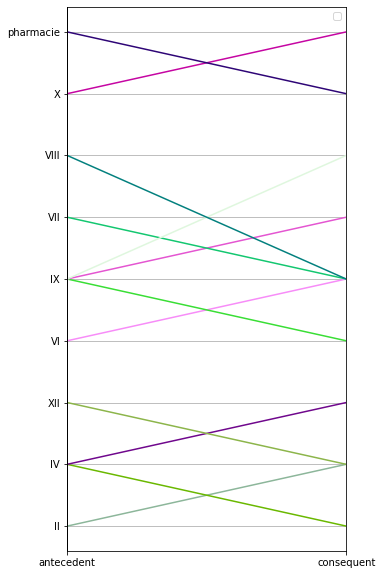

In [90]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(disc2_sets, min_support = 0.03, 
                            use_colnames = True)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(5,10))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()